# 👋

# **OASIS INFOBYTE**

# **Data Science Internship**

# **Author: Ahmad Talha Ansari**

# **Iris Flower Classification 🌼**


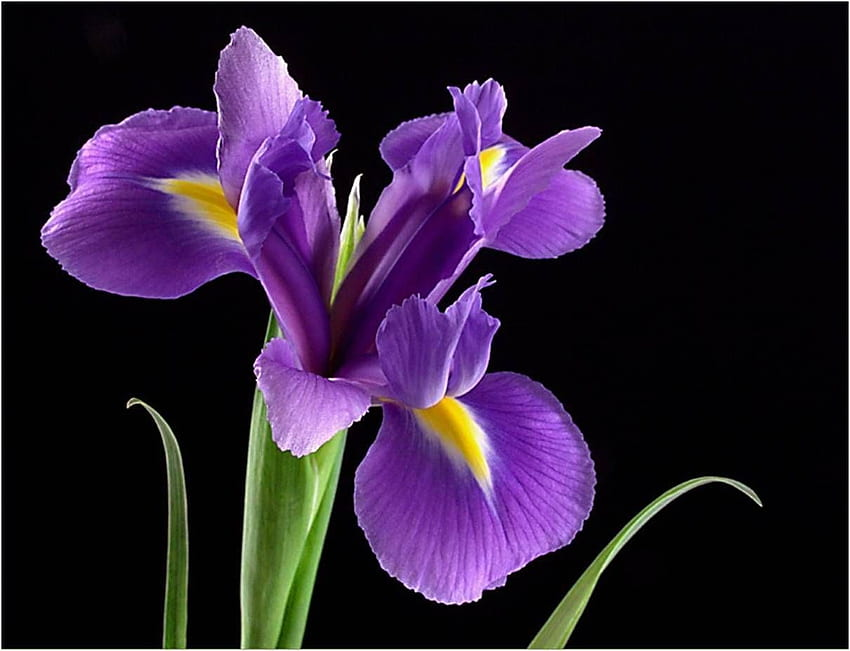

## **Importing Libraries**

In [97]:
import numpy as np                  # for linear algebra
import pandas as pd                 # to work with DataFrames

# visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

## **Loading Dataset**

In [98]:
iris = sns.load_dataset("iris")

## **Know Your Data**

<h3>Few instances of data</h3>

In [99]:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
36,5.5,3.5,1.3,0.2,setosa
92,5.8,2.6,4.0,1.2,versicolor
149,5.9,3.0,5.1,1.8,virginica
55,5.7,2.8,4.5,1.3,versicolor
2,4.7,3.2,1.3,0.2,setosa


<h3>Shape of data</h3>

In [100]:
rows, cols = iris.shape
print(f"""
    Shape of Data
    No. of rows: {rows}
    No. of column: {cols}
        """)


    Shape of Data
    No. of rows: 150
    No. of column: 5
        


<h3>Data Type of each column</h3>

In [101]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

<h3>No. of categories in the target column and their count</h3>

In [102]:
iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Data is balanced ⚖

<h3>No. of NULL values in dataset</h3>

In [103]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## **Exploratory Data Analysis**

<h3>Box-Plot to visualize the outliers</h3>

[]

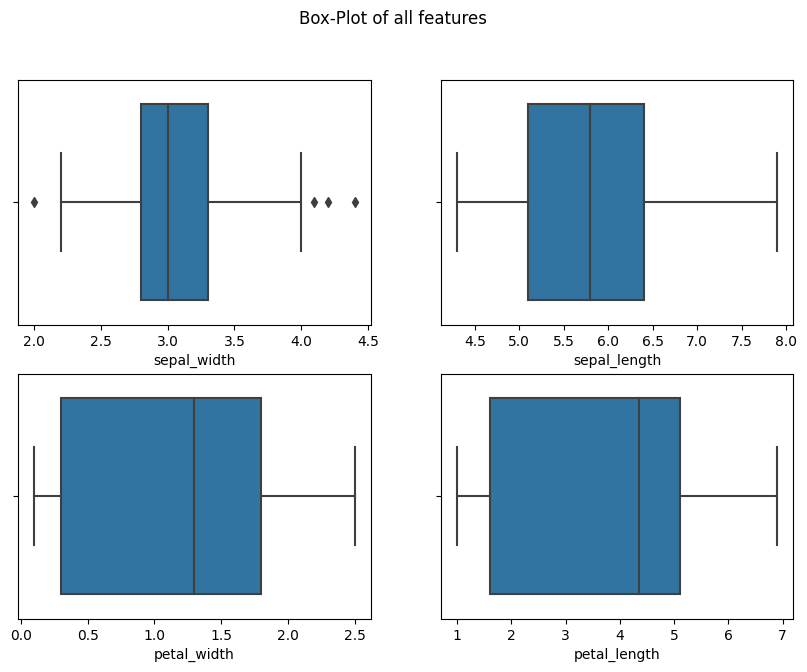

In [104]:
fig, ax = plt.subplots(2, 2, figsize=(10, 7))

sns.boxplot(data=iris, x="sepal_width", ax=ax[0][0])
sns.boxplot(data=iris, x="sepal_length", ax=ax[0][1])
sns.boxplot(data=iris, x="petal_width", ax=ax[1][0])
sns.boxplot(data=iris, x="petal_length", ax=ax[1][1])
fig.suptitle("Box-Plot of all features")
plt.plot()

<h3>Scatter plot of all features</h3>

[]

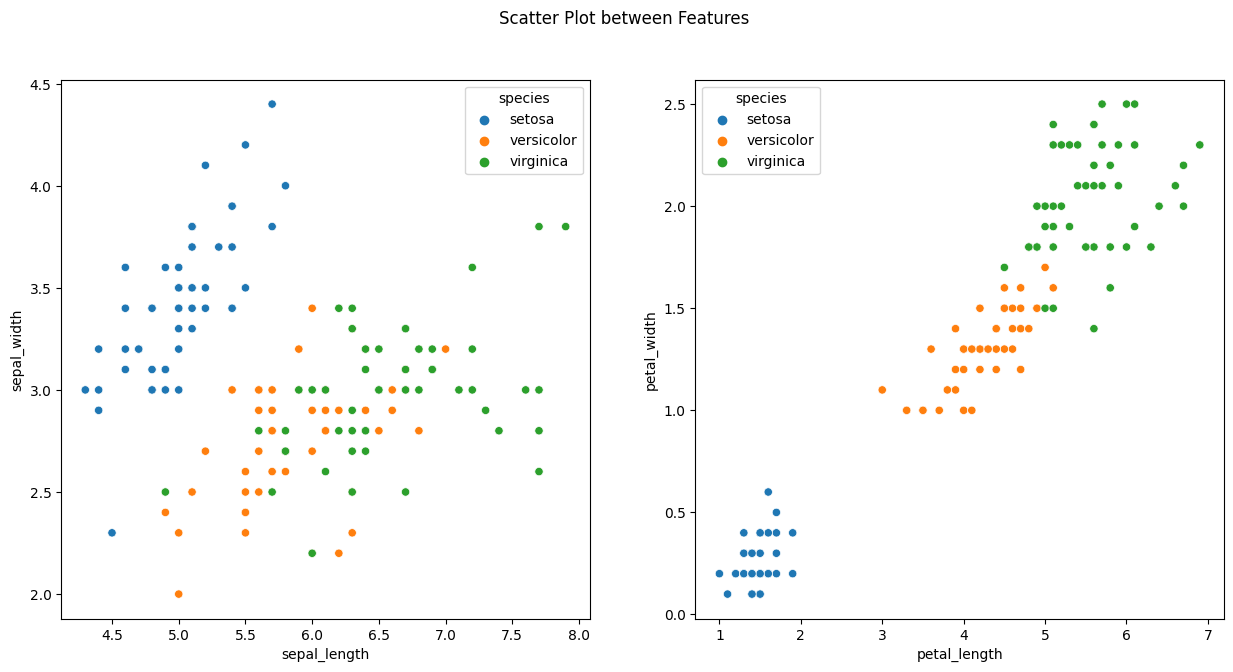

In [105]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

sns.scatterplot(data=iris, x="sepal_length", y="sepal_width", hue="species", ax=ax[0])
sns.scatterplot(data=iris, x="petal_length", y="petal_width", hue="species", ax=ax[1])
fig.suptitle("Scatter Plot between Features")
plt.plot()

## **Splitting Data into Features & Target Column**

In [106]:
X = iris.drop(columns=["species"])
y = iris["species"].values.reshape(-1,1)

In [107]:
oe = OrdinalEncoder().fit(y)
y_ = oe.transform(y)

In [108]:
oe.categories_

[array(['setosa', 'versicolor', 'virginica'], dtype=object)]

In [109]:
X.tail()

,sepal_length,sepal_width,petal_length,petal_width
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


## **Splitting Features & Target into Training & Testing Data**

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

* X_train, y_train (for training purpose).
* X_test, y_test (for testing purpose).

## **Model Training**

In [111]:
lr = LogisticRegression().fit(X_train, y_train)

### Results of Classification Metrics


        Classification Metrics Evaluation
        accuracy score: 1.0,
        precision score: [1. 1. 1.],
        recall score: [1. 1. 1.],
        f1 score: [1. 1. 1.]
      
cross val score 0.9777777777777779 



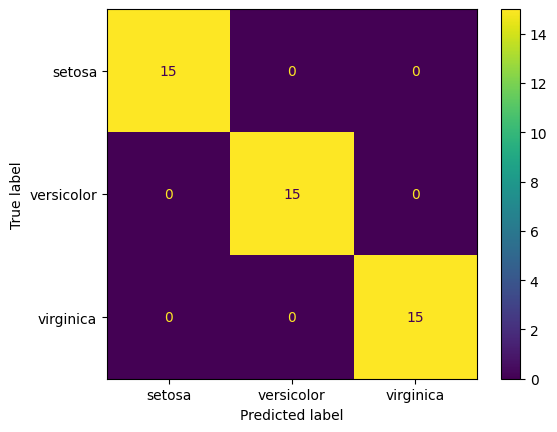

In [112]:
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)
print(f"""
        Classification Metrics Evaluation
        accuracy score: {accuracy},
        precision score: {precision},
        recall score: {recall},
        f1 score: {f1}
      """)
print("cross val score", cross_val_score(lr, X=X_test, y=y_test, scoring="accuracy").mean(), "\n")

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=lr.classes_)
cmd.plot()

# **Thank you 😌**